# DATA

## key features:
* `Text`: User-generated content showcasing sentiments
* `Sentiment`: Categorized emotions
* `Timestamp`: Date and time information
* `User`: Unique identifiers of users contributing
* `Platform`: Social media platform where the content originated
* `Hashtags`: Identifies trending topics and themes
* `Likes`: Quantifies user engagement (likes)
* `Retweets`: Reflects content popularity (retweets)
* `Country`: Geographical origin of each post
* `Year`: Year of the post
* `Month`: Month of the post
* `Day`: Day of the post
* `Hour`: Hour of the post

In [1]:
import pandas as pd
df = pd.read_csv("./sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [2]:
df.shape

(732, 15)

In [3]:
df.dtypes

Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

In [4]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [5]:
from textblob import TextBlob

# Example usage with TextBlob
df['Polarity'] = df['Text'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['Broad_Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

In [6]:
broad_sent = df[['Text', 'Sentiment', 'Broad_Sentiment']]
broad_sent.head()

,Text,Sentiment,Broad_Sentiment
0,Enjoying a beautiful day at the park! ...,Positive,Positive
1,Traffic was terrible this morning. ...,Negative,Negative
2,Just finished an amazing workout! 💪 ...,Positive,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,Positive


## Text Pre-processing

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer 

nltk.download('punkt') 
nltk.download('stopwords') 

stop = set(stopwords.words('english'))

ps = PorterStemmer() 

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# return a list of tokens
def pre_processing_by_nltk(doc, stemming = True, need_sent = False):
    # step 1: get sentences
    sentences = sent_tokenize(doc)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 (optional): stemming
        if stemming:
            words = [ps.stem(word) for word in words if word.lower() not in stop]
        else:
            words = [word for word in words if word.lower() not in stop]
        if need_sent:
            tokens.append(words)
        else:
            tokens += words
    return [w.lower() for w in tokens]

In [9]:
df['Text'][:5]

0     Enjoying a beautiful day at the park!        ...
1     Traffic was terrible this morning.           ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
Name: Text, dtype: object

In [10]:
processed=df['Text'].apply(pre_processing_by_nltk)
processed[:5]

0            [enjoy, beauti, day, park, !]
1              [traffic, terribl, morn, .]
2            [finish, amaz, workout, !, 💪]
3      [excit, upcom, weekend, getaway, !]
4    [tri, new, recip, dinner, tonight, .]
Name: Text, dtype: object

# Binary

In [11]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and temp (20%) for validation + test
X_train, X_temp, y_train, y_temp = train_test_split(df['Text'], df['Broad_Sentiment'], test_size=0.2, random_state=42, shuffle=True)

# Split temp data into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 585
Validation set size: 73
Test set size: 74


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize vectorizer and fit only on X_train
count = CountVectorizer(binary=True)

# Fit on training data
X_train_bag = count.fit_transform(X_train)  # Creates vocabulary from training data

# Transform validation and test data using the same vocabulary
X_test_bag = count.transform(X_test)  # Uses the same vocabulary, ensuring feature consistency
X_val_bag = count.transform(X_val)

#count.vocabulary_

In [13]:
# Train a logistic regression model on training set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train_bag[:1000], y_train[:1000])

In [14]:
#validate model
#predict on validation set
from sklearn.metrics import accuracy_score, classification_report

y_val_predict = clf.predict(X_val_bag)

val_accuracy = accuracy_score(y_val, y_val_predict)
print("Validation Accuracy:", val_accuracy)
print(classification_report(y_val, y_val_predict))

Validation Accuracy: 0.6027397260273972
              precision    recall  f1-score   support

    Negative       0.62      0.28      0.38        18
     Neutral       0.51      0.81      0.63        27
    Positive       0.77      0.61      0.68        28

    accuracy                           0.60        73
   macro avg       0.64      0.57      0.56        73
weighted avg       0.64      0.60      0.59        73



In [15]:
# Evaluate model
score = clf.score(X_test_bag, y_test) 
print("Test Accuracy:", score)

Test Accuracy: 0.7702702702702703


In [16]:
#predict on test set
y_hat = clf.predict(X_test_bag)
test_accuracy = accuracy_score(y_test, y_hat)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7702702702702703


In [17]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_hat)
confusion_mat

array([[ 6,  3,  1],
       [ 0, 30,  3],
       [ 0, 10, 21]])

In [18]:
print('Negative Results:')
TP = confusion_mat[0][0]
FP = confusion_mat[1][0] + confusion_mat[2][0]
FN =confusion_mat[0][1] + confusion_mat[0][2]
TN = confusion_mat[1][1]+ confusion_mat[1][2] + confusion_mat[2][1] + confusion_mat[2][2]

# precision = TP/ (TP + FP)
precision_negative = TP / (TP + FP)
print('precision:', precision_negative)
# Recall = TP/(TP + FN)
recall_negative = TP / (TP + FN)
print('rec:', recall_negative)
# F1 = 2 * (Precision * recall)/(precision + recall)
f1_negative =2 * precision_negative * recall_negative / (precision_negative + recall_negative)
print('f1:', f1_negative)

Negative Results:
precision: 1.0
rec: 0.6
f1: 0.7499999999999999


In [19]:
print('Neutral Results:')
TP = confusion_mat[1][1]
FP = confusion_mat[0][1] + confusion_mat[2][1]
FN =confusion_mat[1][0] + confusion_mat[1][2]
TN = confusion_mat[0][0]+ confusion_mat[0][2] + confusion_mat[2][0] + confusion_mat[2][2]

# precision = TP/ (TP + FP)
precision_neutral = TP / (TP + FP)
print('precision:', precision_neutral)
# Recall = TP/(TP + FN)
recall_neutral = TP / (TP + FN)
print('rec:', recall_neutral)
# F1 = 2 * (Precision * recall)/(precision + recall)
f1_neutral =2 * precision_neutral * recall_neutral / (precision_neutral + recall_neutral)
print('f1:', f1_neutral)

Neutral Results:
precision: 0.6976744186046512
rec: 0.9090909090909091
f1: 0.7894736842105263


In [20]:
print('Positive Results:')
TP = confusion_mat[2][2]
FP = confusion_mat[0][2] + confusion_mat[1][2]
FN =confusion_mat[2][0] + confusion_mat[2][1]
TN = confusion_mat[0][0]+ confusion_mat[0][1] + confusion_mat[1][0] + confusion_mat[1][2]

# precision = TP/ (TP + FP)
precision_pos = TP / (TP + FP)
print('precision:', precision_pos)
# Recall = TP/(TP + FN)
recall_pos = TP / (TP + FN)
print('rec:', recall_pos)
# F1 = 2 * (Precision * recall)/(precision + recall)
f1_pos =2 * precision_pos * recall_pos / (precision_pos + recall_pos)
print('f1:', f1_pos)

Positive Results:
precision: 0.84
rec: 0.6774193548387096
f1: 0.75


In [21]:
print("Classification Report:\n", classification_report(y_test, y_hat))

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.60      0.75        10
     Neutral       0.70      0.91      0.79        33
    Positive       0.84      0.68      0.75        31

    accuracy                           0.77        74
   macro avg       0.85      0.73      0.76        74
weighted avg       0.80      0.77      0.77        74



In [22]:
from sklearn.metrics import roc_auc_score, f1_score

# Predict probabilities for AUROC 
y_prob = clf.predict_proba(X_test_bag)

auroc = roc_auc_score(y_test, y_prob, multi_class='ovr')
macro_f1 = f1_score(y_test, y_hat, average='macro')
micro_f1 = f1_score(y_test, y_hat, average='micro')

print(f"AUROC: {auroc:.4f}")
print(f"Macro-F1 Score: {macro_f1:.4f}")
print(f"Micro-F1 Score: {micro_f1:.4f}")

AUROC: 0.8473
Macro-F1 Score: 0.7632
Micro-F1 Score: 0.7703


# Term Frequency (TF)

In [23]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and temp (20%) for validation + test
X_train, X_temp, y_train, y_temp = train_test_split(df['Text'], df['Broad_Sentiment'], test_size=0.2, random_state=42, shuffle=True)

# Split temp data into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 585
Validation set size: 73
Test set size: 74


In [24]:
sentiments = df['Broad_Sentiment'].unique()
sentiments

array(['Positive', 'Negative', 'Neutral'], dtype=object)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


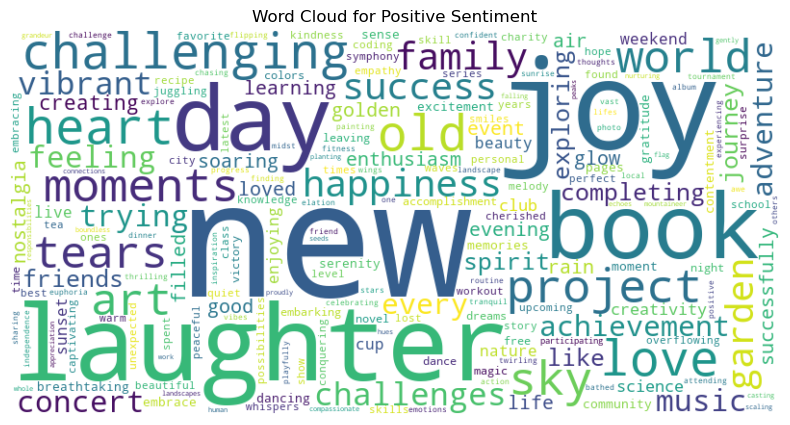

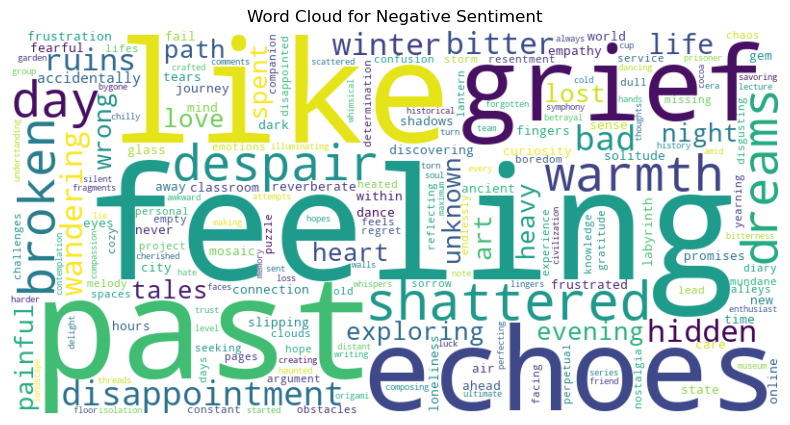

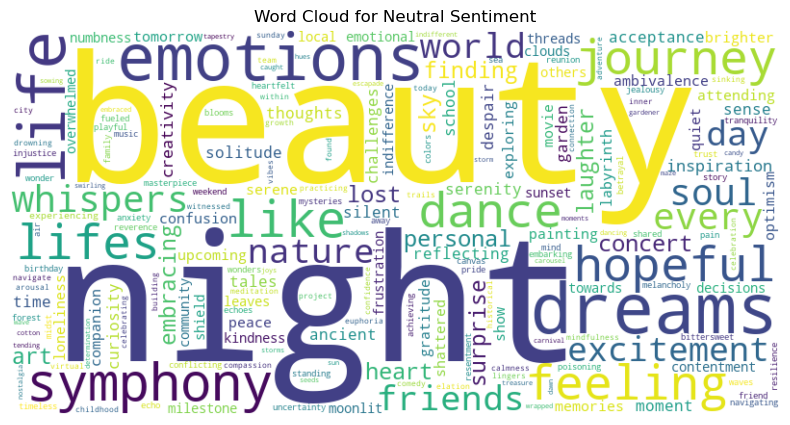

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import pandas as pd
import re


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean and tokenize text."""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

def create_freq_dict(texts):
    """Create a frequency dictionary from a list of texts."""
    freq = defaultdict(int)
    for text in texts:
        tokens = clean_text(text)
        for token in tokens:
            freq[token] += 1
    return freq

# Create frequency dictionaries for each sentiment category
sentiments = df['Broad_Sentiment'].unique()
freq_dicts = {}

for sentiment in sentiments:
    sentiment_texts = df[df['Broad_Sentiment'] == sentiment]['Text']
    freq_dicts[sentiment] = create_freq_dict(sentiment_texts)

# Generate and plot word clouds for each sentiment
for sentiment, freq in freq_dicts.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    wordcloud.generate_from_frequencies(freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


In [26]:
import pandas as pd
import numpy as np

# Initialize vectorizer and fit only on X_train
count = CountVectorizer()

# Fit on training data
X_train_freq = count.fit_transform(X_train)  

# Transform validation and test data using the same vocabulary
X_test_freq = count.transform(X_test) 
X_val_freq = count.transform(X_val)

In [27]:
# Train a logistic regression model on training set
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train_freq[:1000], y_train[:1000])

In [28]:
# Evaluate model
score = clf.score(X_test_freq, y_test) 
print("Test Accuracy:", score)

Test Accuracy: 0.7432432432432432


In [29]:
# Evaluate Model Performance
y_pred = clf.predict(X_test_freq)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.7432432432432432

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.60      0.75        10
     Neutral       0.67      0.88      0.76        33
    Positive       0.80      0.65      0.71        31

    accuracy                           0.74        74
   macro avg       0.82      0.71      0.74        74
weighted avg       0.77      0.74      0.74        74



In [30]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 6  3  1]
 [ 0 29  4]
 [ 0 11 20]]


In [31]:
from sklearn.metrics import roc_auc_score, f1_score

y_pred = clf.predict(X_test_freq)

# Predict probabilities for AUROC 
y_proba = clf.predict_proba(X_test_freq)

auroc = roc_auc_score(y_test, y_proba,  multi_class="ovr")
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print(f"AUROC: {auroc:.4f}")
print(f"Macro-F1 Score: {macro_f1:.4f}")
print(f"Micro-F1 Score: {micro_f1:.4f}")

AUROC: 0.8365
Macro-F1 Score: 0.7425
Micro-F1 Score: 0.7432


# Tfidf

In [32]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and temp (20%) for validation + test
X_train, X_temp, y_train, y_temp = train_test_split(df['Text'], df['Broad_Sentiment'], test_size=0.2, random_state=42, shuffle=True)

# Split temp data into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print dataset sizes
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 585
Validation set size: 73
Test set size: 74


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf.transform(X_test)

# Train the logistic regression model
clf = LogisticRegression(random_state=42).fit(X_train_tfidf, y_train)

# Evaluate the model on the test data
test_accuracy = clf.score(X_test_tfidf, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.6486486486486487


In [34]:
yhat = clf.predict(X_test_tfidf)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_mat = confusion_matrix(y_test, yhat)
confusion_mat

array([[ 1,  7,  2],
       [ 0, 30,  3],
       [ 0, 14, 17]])

In [36]:
from sklearn.metrics import roc_auc_score, f1_score

y_proba = clf.predict_proba(X_test_tfidf)

auroc = roc_auc_score(y_test, y_proba,  multi_class="ovr")
macro_f1 = f1_score(y_test, yhat, average='macro')
micro_f1 = f1_score(y_test, yhat, average='micro')

print(f"AUROC: {auroc:.4f}")
print(f"Macro-F1 Score: {macro_f1:.4f}")
print(f"Micro-F1 Score: {micro_f1:.4f}")

AUROC: 0.8174
Macro-F1 Score: 0.5125
Micro-F1 Score: 0.6486


In [37]:
print("Classification Report:\n", classification_report(y_test, yhat))

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.10      0.18        10
     Neutral       0.59      0.91      0.71        33
    Positive       0.77      0.55      0.64        31

    accuracy                           0.65        74
   macro avg       0.79      0.52      0.51        74
weighted avg       0.72      0.65      0.61        74



## Sentiment Proportion

In [38]:
posts = df.shape[0]

In [39]:
negative_posts = df[df['Broad_Sentiment'] == 'Negative']
num_neg = negative_posts.shape[0]

In [40]:
positive_posts = df[df['Broad_Sentiment'] == 'Positive']
num_pos = positive_posts.shape[0]

In [41]:
neutral_posts = df[df['Broad_Sentiment'] == 'Neutral']
num_neutral = neutral_posts.shape[0]

In [42]:
positive_ratio = num_pos/posts
positive_ratio

0.38524590163934425

In [43]:
negative_ratio = num_neg/posts
negative_ratio

0.1721311475409836

In [44]:
neutral_ratio = num_neutral/posts
neutral_ratio

0.4426229508196721

In [45]:
# Convert 'Timestamp' to datetime if not already
import matplotlib.pyplot as plt
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by Hour to see if there are peaks of negative sentiments
hourly_negatives = negative_posts.groupby(df['Timestamp'].dt.hour).size()

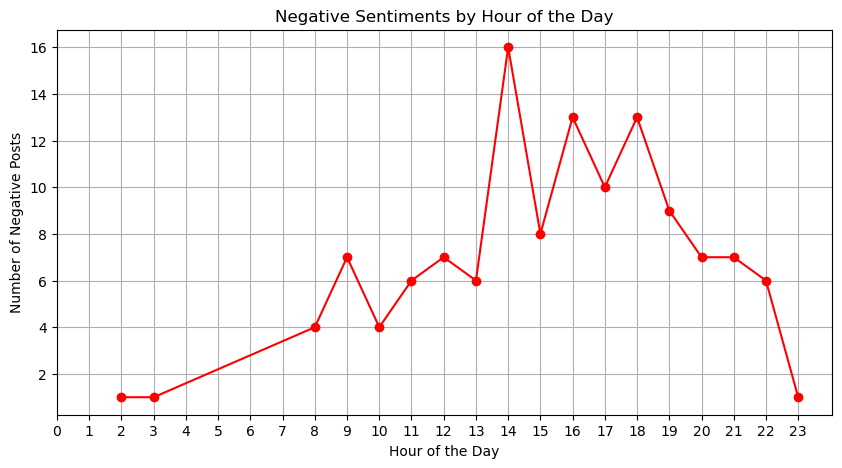

In [46]:
plt.figure(figsize=(10, 5))  # Set the figure size for better readability
plt.plot(hourly_negatives, marker='o', linestyle='-', color='red')  # Add markers for each point
plt.title('Negative Sentiments by Hour of the Day')  # Title of the plot
plt.xlabel('Hour of the Day')  # X-axis label
plt.ylabel('Number of Negative Posts')  # Y-axis label
plt.grid(True)  # Add grid for easier visualization of the plot lines
plt.xticks(range(0, 24))  # Ensure x-axis ticks represent each hour of the day
plt.show()

In [47]:
# Calculate correlation between 'Sentiment' as numerical and 'Likes', 'Retweets'
df['Sentiment_Num'] = df['Broad_Sentiment'].apply(lambda x: 1 if x == 'Negative' else 0)
correlation_likes = df['Sentiment_Num'].corr(df['Likes'])
correlation_retweets = df['Sentiment_Num'].corr(df['Retweets'])

In [48]:
print(f"Correlation between Negative Sentiment and Likes: {correlation_likes}")
print(f"Correlation between Negative Sentiment and Retweets: {correlation_retweets}")

Correlation between Negative Sentiment and Likes: -0.16310733906671496
Correlation between Negative Sentiment and Retweets: -0.1615649666009304


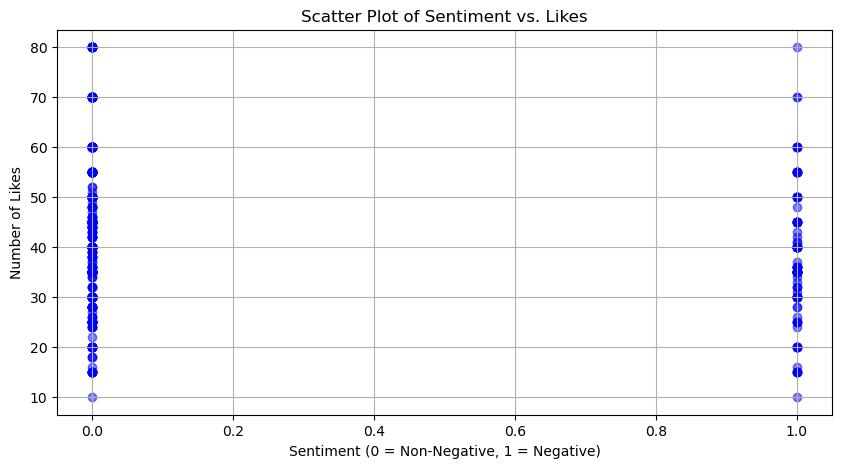

In [49]:
# Plotting Sentiment_Num vs. Likes
plt.figure(figsize=(10, 5))
plt.scatter(df['Sentiment_Num'], df['Likes'], alpha=0.5, color='blue')  # alpha for transparency
plt.title('Scatter Plot of Sentiment vs. Likes')
plt.xlabel('Sentiment (0 = Non-Negative, 1 = Negative)')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.show()

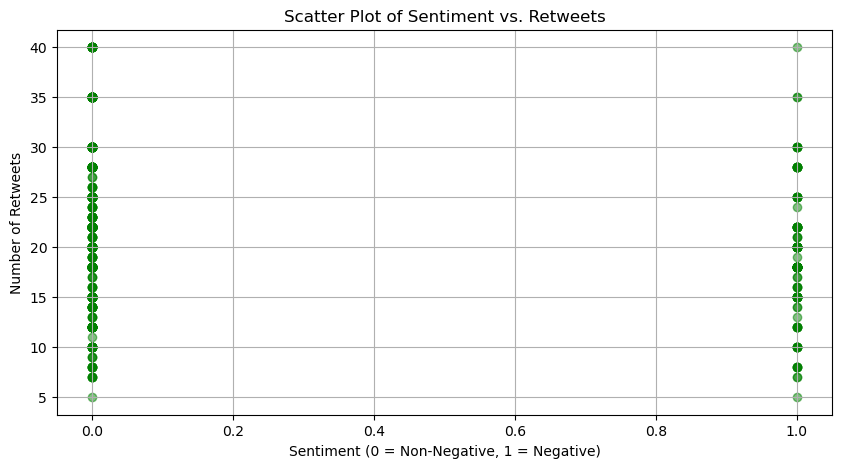

In [50]:
# Plotting Sentiment_Num vs. Retweets
plt.figure(figsize=(10, 5))
plt.scatter(df['Sentiment_Num'], df['Retweets'], alpha=0.5, color='green')
plt.title('Scatter Plot of Sentiment vs. Retweets')
plt.xlabel('Sentiment (0 = Non-Negative, 1 = Negative)')
plt.ylabel('Number of Retweets')
plt.grid(True)
plt.show()

/tmp/ipykernel_62160/1602561866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_posts['Country'] = negative_posts['Country'].str.strip().str.title()


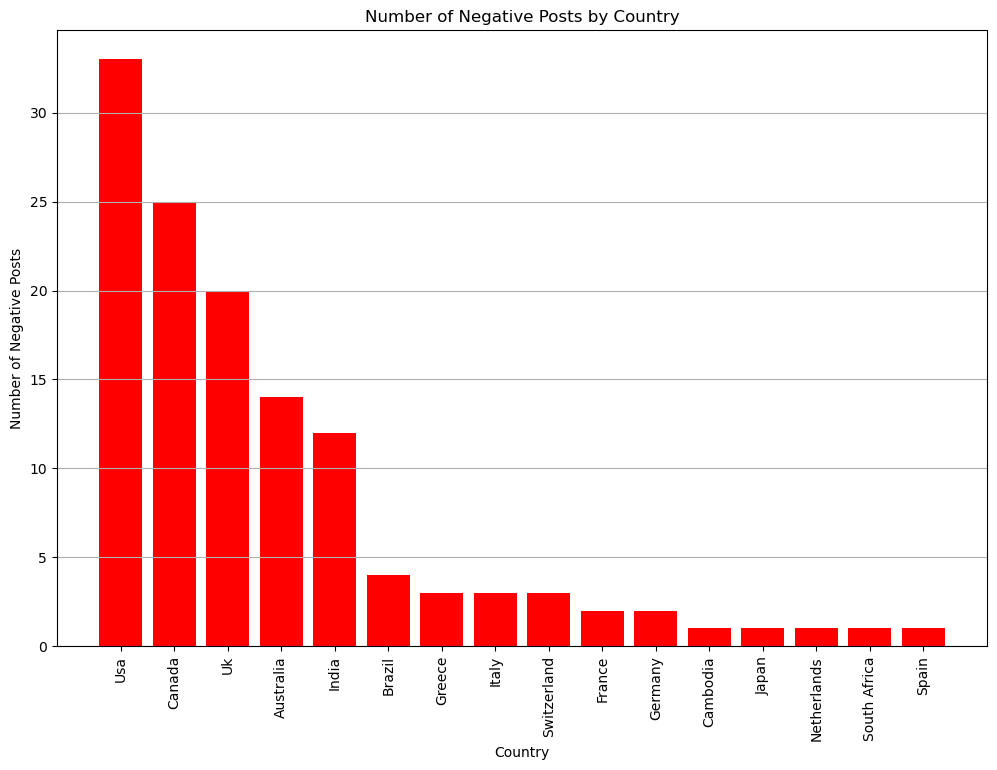

In [51]:
import matplotlib.pyplot as plt

# Standardize the 'Country' column to avoid inconsistencies
negative_posts['Country'] = negative_posts['Country'].str.strip().str.title()

# Group by country and count the occurrences
negative_by_country = negative_posts.groupby('Country', as_index=False).size()

# Sorting the data for better visualization
negative_by_country = negative_by_country.sort_values(by='size', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size
plt.bar(negative_by_country['Country'], negative_by_country['size'], color='red')
plt.title('Number of Negative Posts by Country')
plt.xlabel('Country')
plt.ylabel('Number of Negative Posts')
plt.xticks(rotation=90)  # Rotate labels for readability
plt.grid(axis='y')  # Add horizontal grid lines for readability
plt.show()


In [52]:
# Group by Year and Month for trend analysis
monthly_trends = negative_posts.groupby([df['Year'], df['Month']]).size()

In [53]:
# Reset index to make 'Year' and 'Month' regular columns
monthly_trends = monthly_trends.reset_index(name='Count')

# Create a 'Date' column for plotting
monthly_trends['Date'] = pd.to_datetime(monthly_trends.rename(columns={0: 'Year', 1: 'Month'}).assign(Day=1)[['Year', 'Month', 'Day']])

# Sort by date just in case
monthly_trends = monthly_trends.sort_values('Date')


In [56]:
monthly_trends.head()

,Year,Month,Count,Date
0,2012,2,1,2012-02-01
1,2012,3,2,2012-03-01
2,2015,6,2,2015-06-01
3,2015,10,1,2015-10-01
4,2015,12,1,2015-12-01


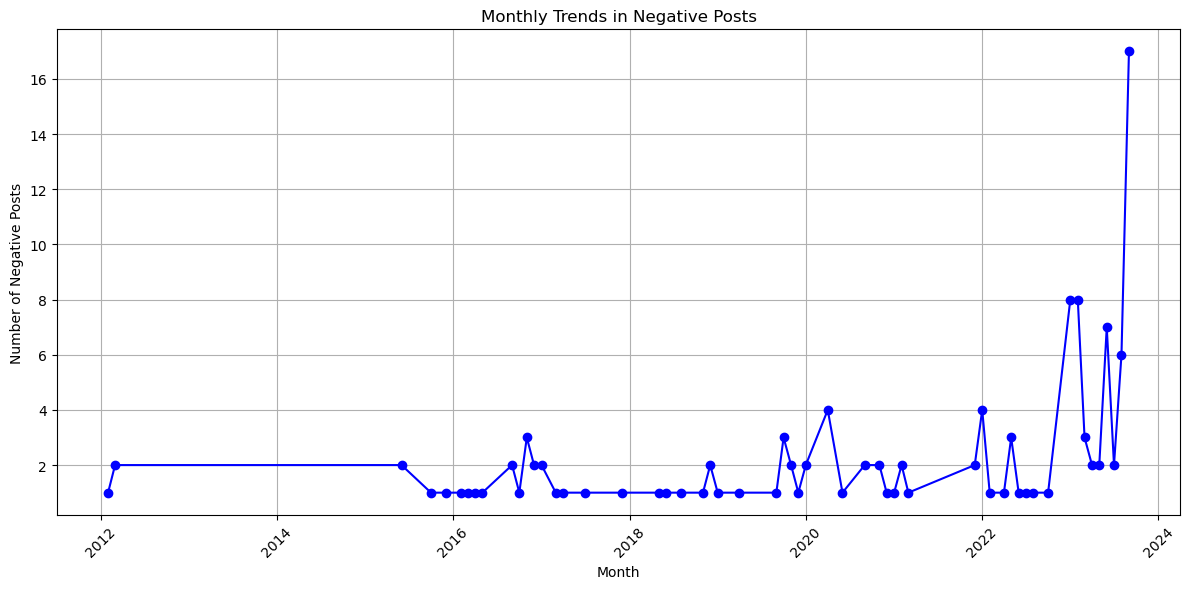

In [55]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(monthly_trends['Date'], monthly_trends['Count'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Trends in Negative Posts')
plt.xlabel('Month')
plt.ylabel('Number of Negative Posts')
plt.grid(True)  # Optional, for better readability
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjusts plot parameters to give the subplot more room
plt.show()